## Reconstruction parcimonieuse


On s'intéresse au problème

$$\hspace{5cm} (\mathcal{P})\quad \min_{x\in \mathbb{R}^n}f(x) = \frac{1}{2}\Vert H x-y \Vert_W^2+\lambda \Vert x \Vert_1 $$

avec $y\in \mathbb{R}^m$ une observation du signal à reconstruire, $H\in \mathcal{M}_{m,n}(\mathbb{R})$, $W\in \mathcal{M}_{m}(\mathbb{R})$ symétrique définie positive. La matrice $W$ introduit une pondération sur les composantes du résidu.

**Question 1 :** Justifier la convexité de la fonctionnelle et donner un sous-gradient.


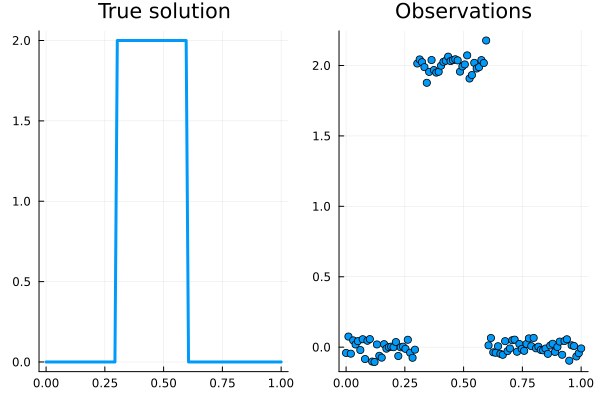

In [2]:
#Pkg.add("Plots")
using Plots
import LinearAlgebra
using LinearAlgebra
# Construction du problème #
############################

# solution à reconstruire 
##########################
dx=0.01;

n=Int(1/dx);#+1;
px=LinRange(0.,1.,n);
xt=zeros(n,1);

for i = 1:n
    if (px[i] > 0.3 && px[i]< 0.6)
        xt[i] = 2;         
    end
end


#observations
#############
nobs=1;
m=Int(floor(n/nobs));
var_obs=0.05;
sigmaW=ones(m,1)+2.0*rand(Float64,(m,1));

H=zeros(m,n);
py=zeros(m,1);
W=zeros(m,m);
for i=1:m
   H[i,(i-1)*nobs+1]=1;
   py[i]=px[(i-1)*nobs+1]; 
   W[i,i]=sigmaW[i];
end    
y=H*xt+var_obs*randn(Float64,(m,1));


p1=plot(px,xt,title="True solution",label=["xt"],lw=3);
p2=scatter(py,y,title="Observations",lw=3);
plot(p1,p2,layout=(1,2),legend=false)

**Question 2 :** Proposer le calcul de l'évaluation de f et d'un sous-gradient de f

In [3]:
# Fonction évaluant f en x
function evalf(x,y,H,W,lambda) 
    return (transpose(H*x - y)*W*(H*x - y)/2 .+ lambda*norm(x,1))[1]
end

# Fonction évaluant un sous-gradient de f en x
function subgradf(x,y,H,W,lambda) 
   return(transpose(H)*W*(H*x-y) .+ lambda*sign.(x))
end

subgradf (generic function with 1 method)

**Question 3 :** Résoudre le problème en utilisant un algorithme de sous-gradient. Vous implanterez les trois stratégies de pas vues en cours. Vous afficherez les courbes de convergence de $f_{best}^k$. 

Pas constant, 

**Question 4 :** Quelle influence a le paramètre $\lambda$ sur la convergence de l'algorithme et la qualité de la solution optimisée ?

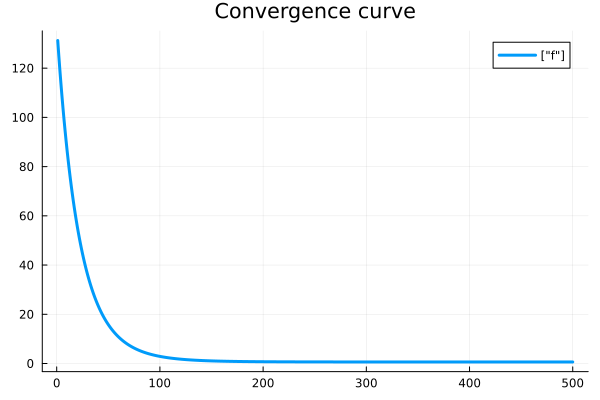

In [4]:
#Pkg.add("Plots")
using Plots

#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k

lambda=1e-2;

pas=0.01; #par defaut on va mettre 10-2
itermax=500;

xp=x;
while i < itermax
    i = i + 1;
    # Insérer votre code

    if evalf(xp,y,H,W,lambda) < fbest
        fbest = evalf(xp,y,H,W,lambda)
        xbest = xp
    end
    sg = subgradf(xp,y,H,W,lambda)
    xp = xp - pas*sg
    # Fin insérer code
    
    # Stockage
    append!( histo, fbest)
end
#Affichage des courbes de convergence
#plotly();
iter=1:itermax;
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)

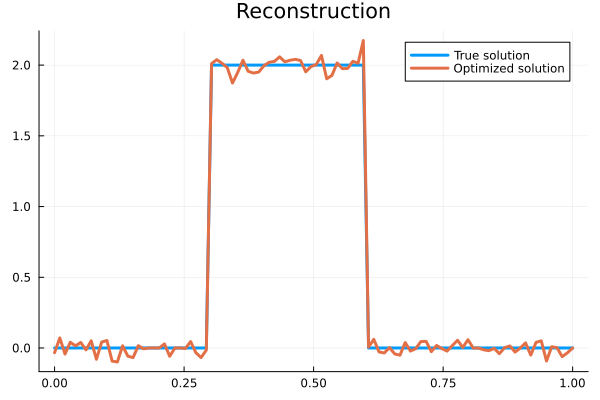

In [5]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

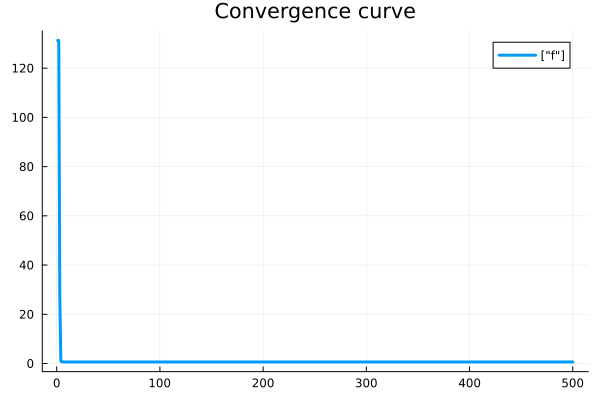

In [6]:
#Pkg.add("Plots")
using Plots

#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k

lambda=1e-2;

#pas=1; #par defaut on va mettre 10-2
itermax=500;

xp=x;
while i < itermax
    i = i + 1;
    # Insérer votre code
    pas = 1/i

    if evalf(xp,y,H,W,lambda) < fbest
        fbest = evalf(xp,y,H,W,lambda)
        xbest = xp
    end
    sg = subgradf(xp,y,H,W,lambda)
    xp = xp - pas*sg
    # Fin insérer code
    
    # Stockage
    append!( histo, fbest)
end
#Affichage des courbes de convergence
#plotly();
iter=1:itermax;
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)

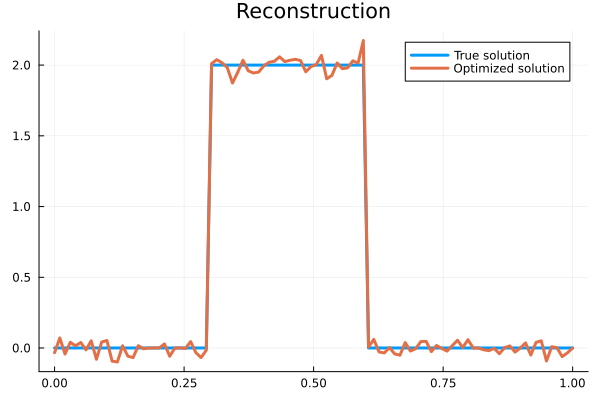

In [7]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

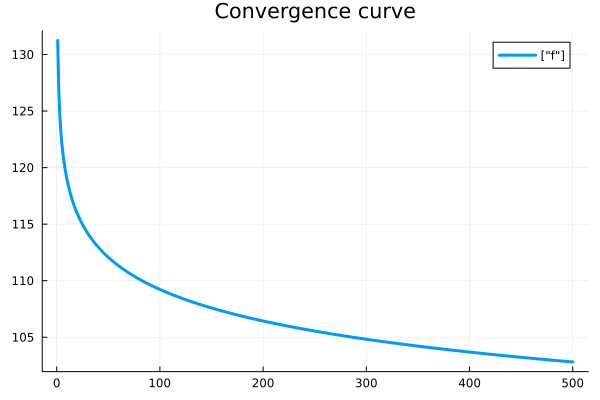

In [8]:
#Pkg.add("Plots")
using Plots

#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k

lambda=1e-2;

#pas=0.01; #par defaut on va mettre 10-2
itermax=500;

xp=x;
while i < itermax
    i = i + 1;
    # Insérer votre code
    pas = (1/i)/norm(subgradf(xp,y,H,W,lambda), 1)
    if evalf(xp,y,H,W,lambda) < fbest
        fbest = evalf(xp,y,H,W,lambda)
        xbest = xp
    end
    sg = subgradf(xp,y,H,W,lambda)
    xp = xp - pas*sg
    # Fin insérer code
    
    # Stockage
    append!( histo, fbest)
end
#Affichage des courbes de convergence
#plotly();
iter=1:itermax;
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)

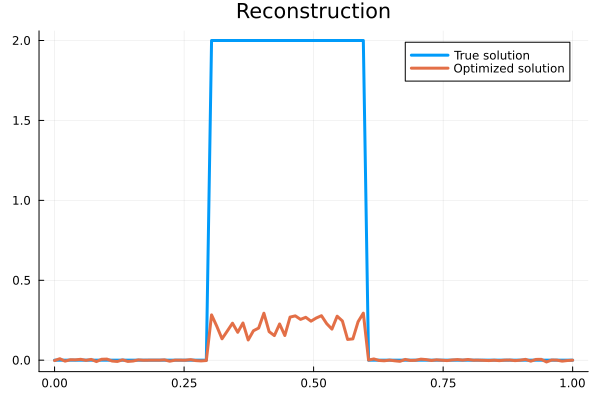

In [9]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

**Question 5 :** On pose $h(x)=\lambda \Vert x\Vert_1$ et $g(x)=\frac{1}{2}\Vert Hx-y\Vert_W^2$. Donner une expression analytique de la fonction proximale de h et implanter cette fonction. Implanter la fonction $g$ ainsi que son gradient.


In [45]:
# Evaluation de prox_h
function proxh(x,lambda) 
   return sign.(x).*max.(0, abs.(x.-lambda))
end

#Evaluation de g
function evalg(x,y,H,W)
   return (transpose(H*x - y)*W*(H*x - y)/2)[1]
end    


#Evaluation du gradient de g
function gradg(x,y,H,W)
   return(transpose(H)*W*(H*x-y))
end    

gradg (generic function with 1 method)

**Question 6 :** Résoudre le problème par la méthode du gradient proximal avec recherche linéaire pour le pas. Vous implanterez en prémabule la fonction de recherche linéaire.

In [46]:
# Fonction calculant le pas par recherche linéaire
# Insérer votre code
function linear_search(alpha,x,beta,grad, lambda)
    t = alpha
    G = (x - proxh(x - t*grad,lambda))/t
    while evalg(x - t*G,y,H,W) > (evalg(x,y,H,W) .- (t*transpose(G)*grad)[1] .+ t*(norm(G,2)^2)/2)
        t = beta*t 
        G = (x - proxh(x - t*grad,lambda))/t
    end
   return t
end  
# Fin insérer code

linear_search (generic function with 1 method)

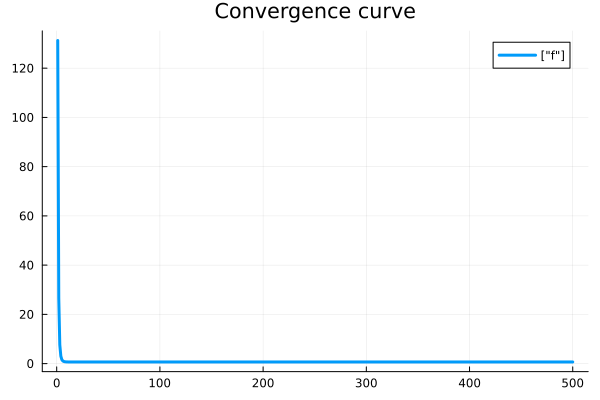

In [72]:
#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo =[];# Suite des itérés f_{best}^k 

lambda0=0.01;
itermax=500;
beta=0.5;

alpha = 1
alpha_tab =[]

xp=x;
while i < itermax
    i = i + 1;
    # Insérer votre code
    if evalf(xp,y,H,W,lambda0) < fbest
        fbest = evalf(xp,y,H,W,lambda0)
        xbest = xp
    end
    alpha = linear_search(alpha,xp,beta,gradg(xp,y,H,W), lambda0)
    xp = proxh(xp - alpha*gradg(xp,y,H,W),lambda0)

    # Fin insérer code
    
    # Stockage
    append!( histo, fbest)
    append!( alpha_tab, alpha)

end
#histo
#Affichage des courbes de convergence
#plotly();
iter=1:itermax;
plot(iter,histo,title="Convergence curve",label=["f"],lw=3)
#plot(iter,alpha_tab,title="Alpha",label=["f"],lw=3)

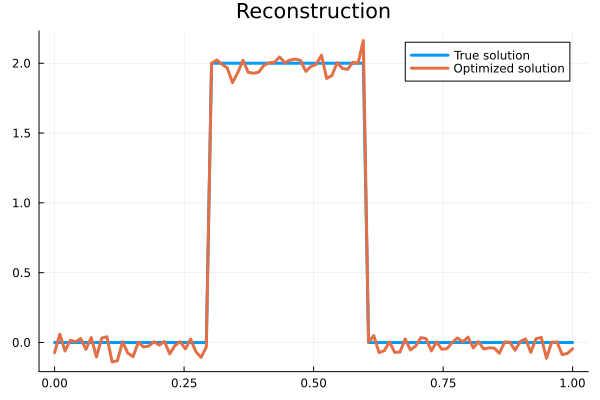

In [73]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

**Question 7 :** Evaluez la sensisibilité de l'algorithme aux différents paramètres : $\lambda_0$, $\beta$, itermax.  

il faut un petit lambda mais pas un trop petit beta